In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('C:/Users/Jaladi Deepika/Downloads/archive'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/Jaladi Deepika/Downloads/archive\test\DR\00cb6555d108_png.rf.29cca170969c6e9918ef9b9209abef8e.jpg
C:/Users/Jaladi Deepika/Downloads/archive\test\DR\0104b032c141_png.rf.2b861f09f8526f5316cd44d8522bf62e.jpg
C:/Users/Jaladi Deepika/Downloads/archive\test\DR\03747397839f_png.rf.b634cf9fb09372b2c9c6bc6616bd5d7c.jpg
C:/Users/Jaladi Deepika/Downloads/archive\test\DR\04d029cfb612_png.rf.d9cf2e2a4e995a99b83e2595d66db6d2.jpg
C:/Users/Jaladi Deepika/Downloads/archive\test\DR\0ada12c0e78f_png.rf.3e8e491a2cacb9af201e2f89f3afca61.jpg
C:/Users/Jaladi Deepika/Downloads/archive\test\DR\0bf37ca3156a_png.rf.5fd49da65121f9fd951a208b5f085744.jpg
C:/Users/Jaladi Deepika/Downloads/archive\test\DR\0f495d87656a_png.rf.707a2bb8a1223a714fcb88d67eb153c0.jpg
C:/Users/Jaladi Deepika/Downloads/archive\test\DR\1177d583c807_png.rf.ecb8848ab217877e4877c8034c59b198.jpg
C:/Users/Jaladi Deepika/Downloads/archive\test\DR\1411c8ab7161_png.rf.892f5c081e1fb52861ed50975fc3a444.jpg
C:/Users/Jaladi Deepika/Downloads/arc

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import os
import cv2
import sklearn
!pip install tensorflow
import tensorflow as tf

from tensorflow import keras
from PIL import Image as im
from glob import glob
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet_v2 import ResNet152V2
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout,MaxPooling2D,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from pathlib import Path
from tqdm.notebook import tqdm
from sklearn import preprocessing
import plotly.express as px
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

In [3]:
train_root_path ='C:/Users/Jaladi Deepika/Downloads/archive/train'
test_root_path ='C:/Users/Jaladi Deepika/Downloads/archive/test'
validation_path='C:/Users/Jaladi Deepika/Downloads/archive/valid'

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True,
rescale=1./255
)

test_datagen = ImageDataGenerator(rescale = 1./255)


In [5]:
train_set = train_datagen.flow_from_directory(
    'C:/Users/Jaladi Deepika/Downloads/archive/train',
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=32,  
    class_mode='categorical',
    shuffle=True
)

Found 2076 images belonging to 2 classes.


In [6]:
validation_set = test_datagen.flow_from_directory(
    'C:/Users/Jaladi Deepika/Downloads/archive/valid',
    target_size=(224,224),
    color_mode="rgb",
    batch_size=32,  # set as validation data
    class_mode='categorical',
    shuffle=True
)

Found 531 images belonging to 2 classes.


In [7]:
test_set = test_datagen.flow_from_directory(
    'C:/Users/Jaladi Deepika/Downloads/archive/test',
    target_size=(224,224),
    color_mode="rgb",
    batch_size=32,  # set as test data
    class_mode='categorical',
    shuffle=True
)

Found 231 images belonging to 2 classes.


In [8]:
#Check data type/shape
img= train_set[0]
print(f'Train data type: {type(train_set)}')
print(f'Train data shape: {train_set[0][0].shape}')
print(f'Train classes: {img[1].shape}')

img= validation_set[0]
print(f'\nValid. data type: {type(validation_set)}')
print(f'Valid. data shape: {validation_set[0][0].shape}')
print(f'Valid. classes: {img[1].shape}')

img= test_set[0]
print(f'\nTest data type: {type(test_set)}')
print(f'Test data shape: {test_set[0][0].shape}')
print(f'Test classes: {img[1].shape}')

Train data type: <class 'keras.src.preprocessing.image.DirectoryIterator'>
Train data shape: (32, 224, 224, 3)
Train classes: (32, 2)

Valid. data type: <class 'keras.src.preprocessing.image.DirectoryIterator'>
Valid. data shape: (32, 224, 224, 3)
Valid. classes: (32, 2)

Test data type: <class 'keras.src.preprocessing.image.DirectoryIterator'>
Test data shape: (32, 224, 224, 3)
Test classes: (32, 2)


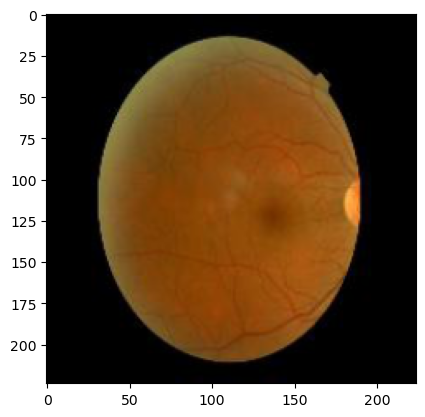

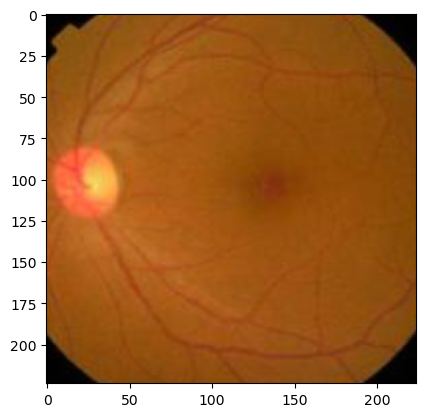

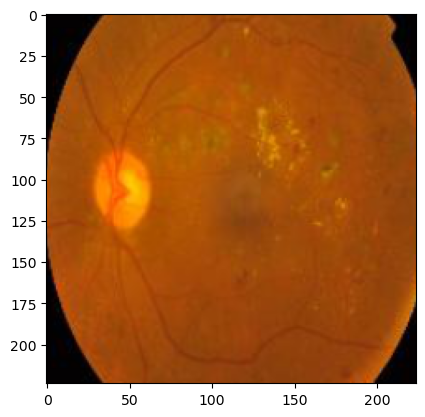

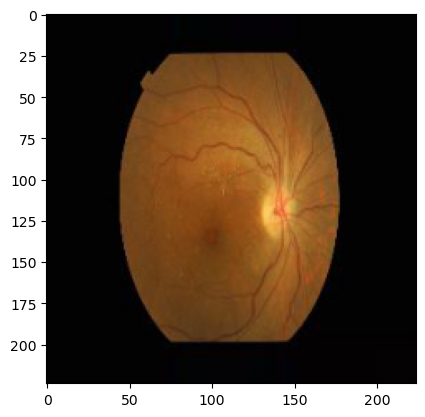

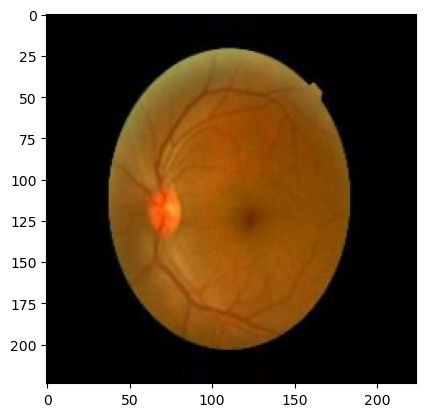

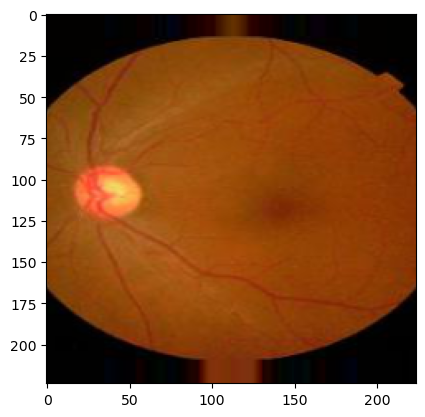

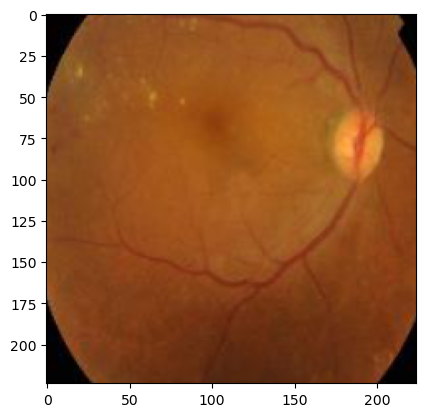

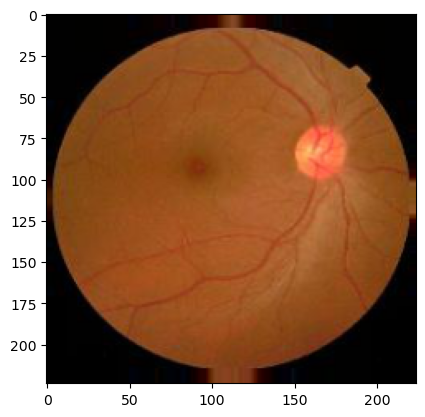

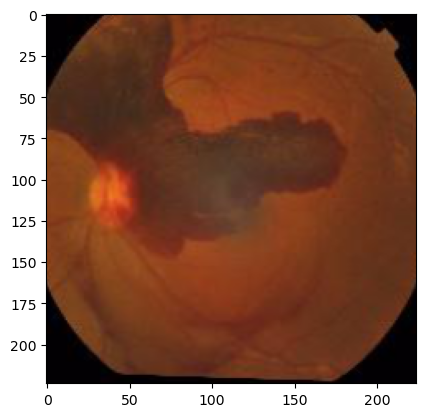

In [9]:
im, la = next(train_set)

for i in range(9):
    plt.imshow(im[i])
    plt.show()

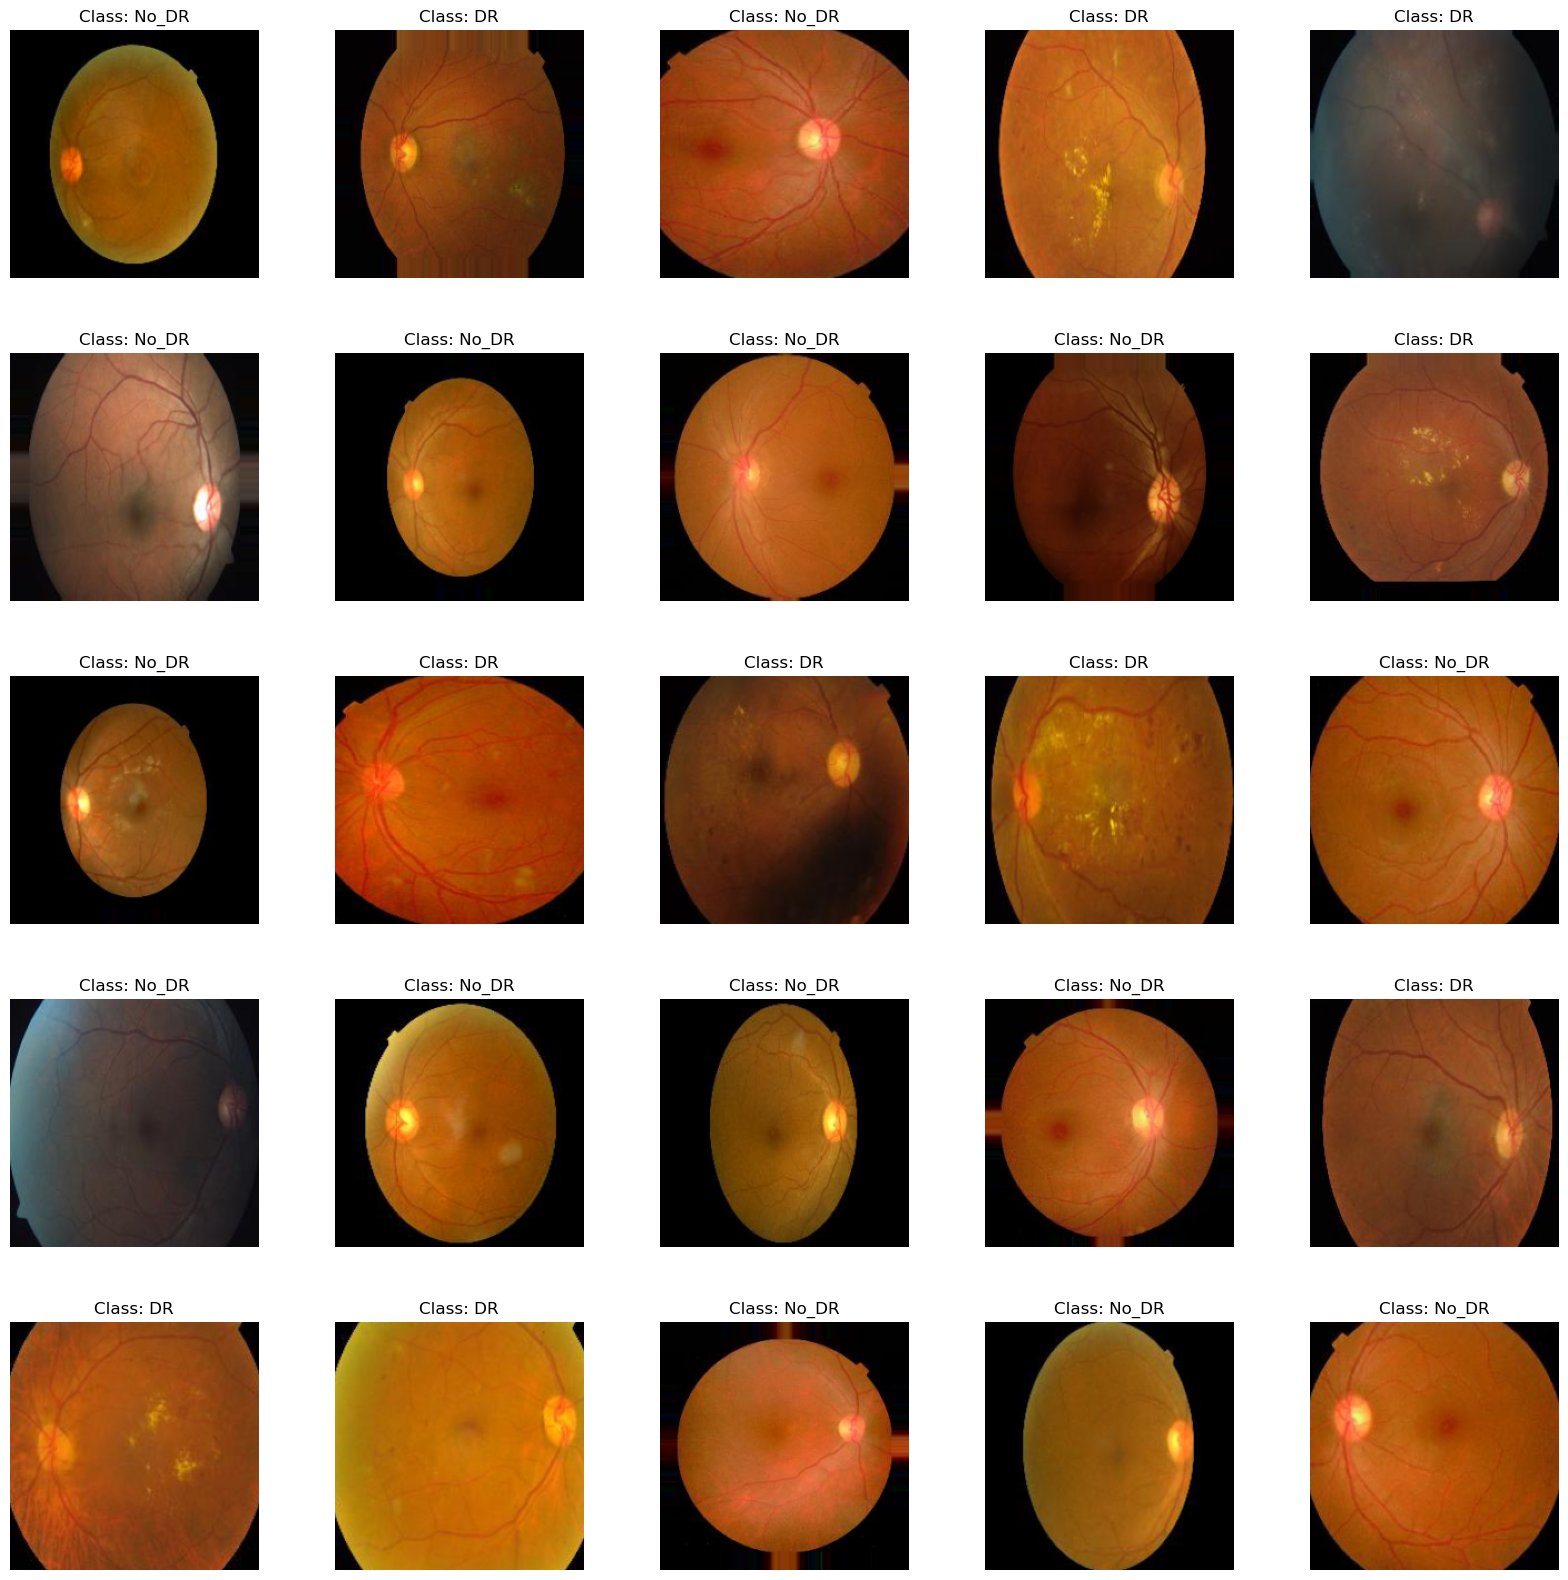

In [10]:
# Display a grid of 25 sample training images with corresponding class labels.
labels = [k for k in train_set.class_indices]
sample_generate = train_set.__next__()

images = sample_generate[0]
titles = sample_generate[1]
plt.figure(figsize = (20 , 20))

for i in range(25):
    plt.subplot(5 , 5, i+1)
    plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
    plt.imshow(images[i])
    plt.title(f'Class: {labels[np.argmax(titles[i],axis=0)]}')
    plt.axis("off")

Working with 1026 images
Image examples: 
002c21358ce6_png.rf.31ccb999f6cc5cec5b0582cc29aac015.jpg


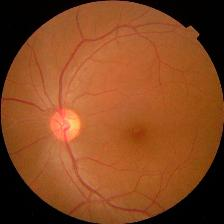

0097f532ac9f_png.rf.a4c88614422d7d7acce8c8a39c20d261.jpg


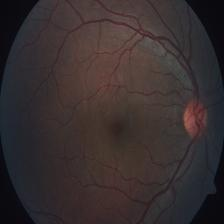

00cc2b75cddd_png.rf.68ceab476d4bc6647b4893a2c71b258f.jpg


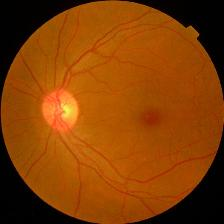

00f6c1be5a33_png.rf.25847756f71abc5d255948442683f4ca.jpg


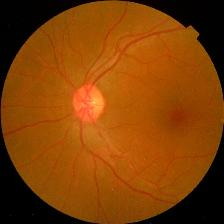

0125fbd2e791_png.rf.2e2da9d99e6edc291b10c50f0a21250d.jpg


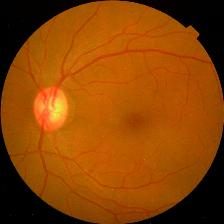

0151781fe50b_png.rf.7ed65941ade797e848a26e26d916634f.jpg


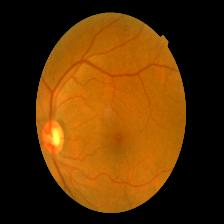

0182152c50de_png.rf.e4a49821f9474aa51fc76c780f671bc4.jpg


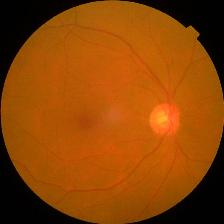

0232dfea7547_png.rf.3253b6d4c9844ee52acb7e6a7f3208ec.jpg


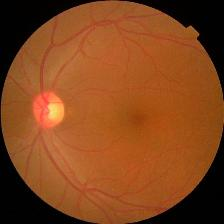

02cd34a85b24_png.rf.73c0c1488235ed5b748dba3480df0f93.jpg


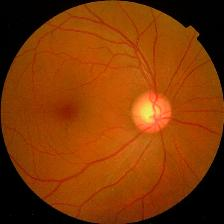

02da652c74b8_png.rf.76ade37ee2018a06e591f33d34eb6b3f.jpg


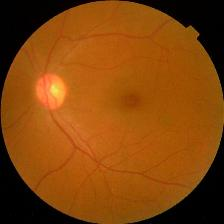

In [11]:
from PIL import Image
import os
from IPython.display import display
from IPython.display import Image as _Imgdis
# creating a object

image_path = 'C:/Users/Jaladi Deepika/Downloads/archive/train'
folder = image_path+'/No_DR'



onlybenignfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print("Working with {0} images".format(len(onlybenignfiles)))
print("Image examples: ")

for i in range(10):
    print(onlybenignfiles[i])
    display(_Imgdis(filename=folder + "/" + onlybenignfiles[i], width=240, height=240))

In [12]:
#Model Transfer Learning : VGG19
BATCH_SIZE = 32
IMAGE_SIZE = [224, 224]
CHANNELS=3
EPOCHS=25

In [20]:
vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [22]:
for layer in vgg19.layers:
    print(layer)

In [16]:
for layer in vgg19.layers:
    layer.trainable = False

In [17]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [18]:
model_vgg19 = Sequential()

model_vgg19.add(vgg19)
model_vgg19.add(Flatten())
model_vgg19.add(Dropout(0.2))
model_vgg19.add(Dense(256,activation='relu'))
model_vgg19.add(Dropout(0.2))
model_vgg19.add(Dense(2,activation='softmax'))

In [19]:
model_vgg19.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dropout (Dropout)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 514       
                                                                 
Total params: 26447682 (100.89 MB)
Trainable params: 642

In [20]:
model_vgg19.compile(
    optimizer = Adam(lr=0.001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

In [21]:
model_vgg_history = model_vgg19.fit(
  train_set,
  validation_data=validation_set,
  epochs=EPOCHS,
  steps_per_epoch=len(train_set),
  validation_steps=len(test_set)
)

Epoch 1/25



65/65 [==============================] - 542s 8s/step - loss: 1.1335 - accuracy: 0.8280 - val_loss: 0.2277 - val_accuracy: 0.9375
Epoch 2/25
65/65 [==============================] - 523s 8s/step - loss: 0.2253 - accuracy: 0.9147 - val_loss: 0.1840 - val_accuracy: 0.9297
Epoch 3/25
65/65 [==============================] - 508s 8s/step - loss: 0.2270 - accuracy: 0.9186 - val_loss: 0.2463 - val_accuracy: 0.9023
Epoch 4/25
65/65 [==============================] - 510s 8s/step - loss: 0.2141 - accuracy: 0.9234 - val_loss: 0.1992 - val_accuracy: 0.9219
Epoch 5/25
65/65 [==============================] - 509s 8s/step - loss: 0.2066 - accuracy: 0.9311 - val_loss: 0.1486 - val_accuracy: 0.9453
Epoch 6/25
65/65 [==============================] - 503s 8s/step - loss: 0.1945 - accuracy: 0.9340 - val_loss: 0.1632 - val_accuracy: 0.9336
Epoch 7/25
65/65 [==============================] - 502s 8s/step - loss: 0.2009 - accuracy: 0.9234 - val_loss: 0.1687 - val_accuracy: 0.9375
Epoch 8/25
65/65 [======

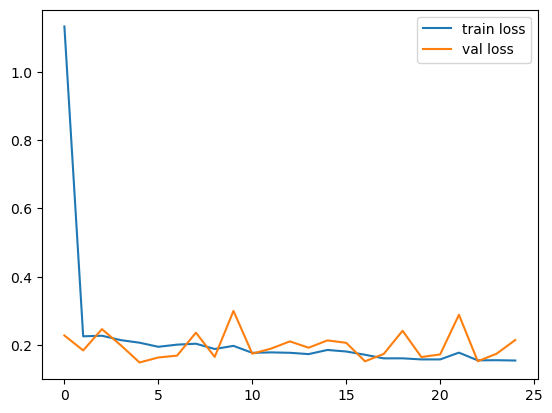

<Figure size 640x480 with 0 Axes>

In [22]:
plt.plot(model_vgg_history.history['loss'], label='train loss')
plt.plot(model_vgg_history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

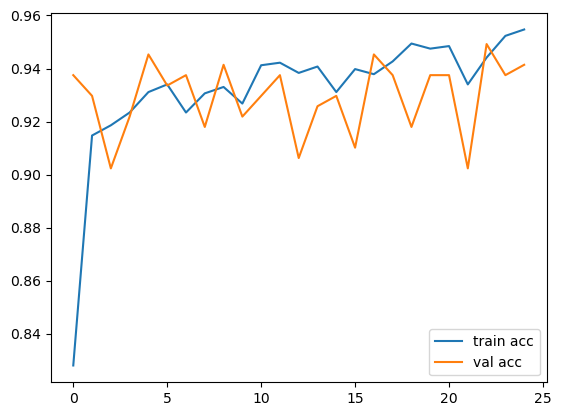

<Figure size 640x480 with 0 Axes>

In [23]:
# plot the accuracy
plt.plot(model_vgg_history.history['accuracy'], label='train acc')
plt.plot(model_vgg_history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

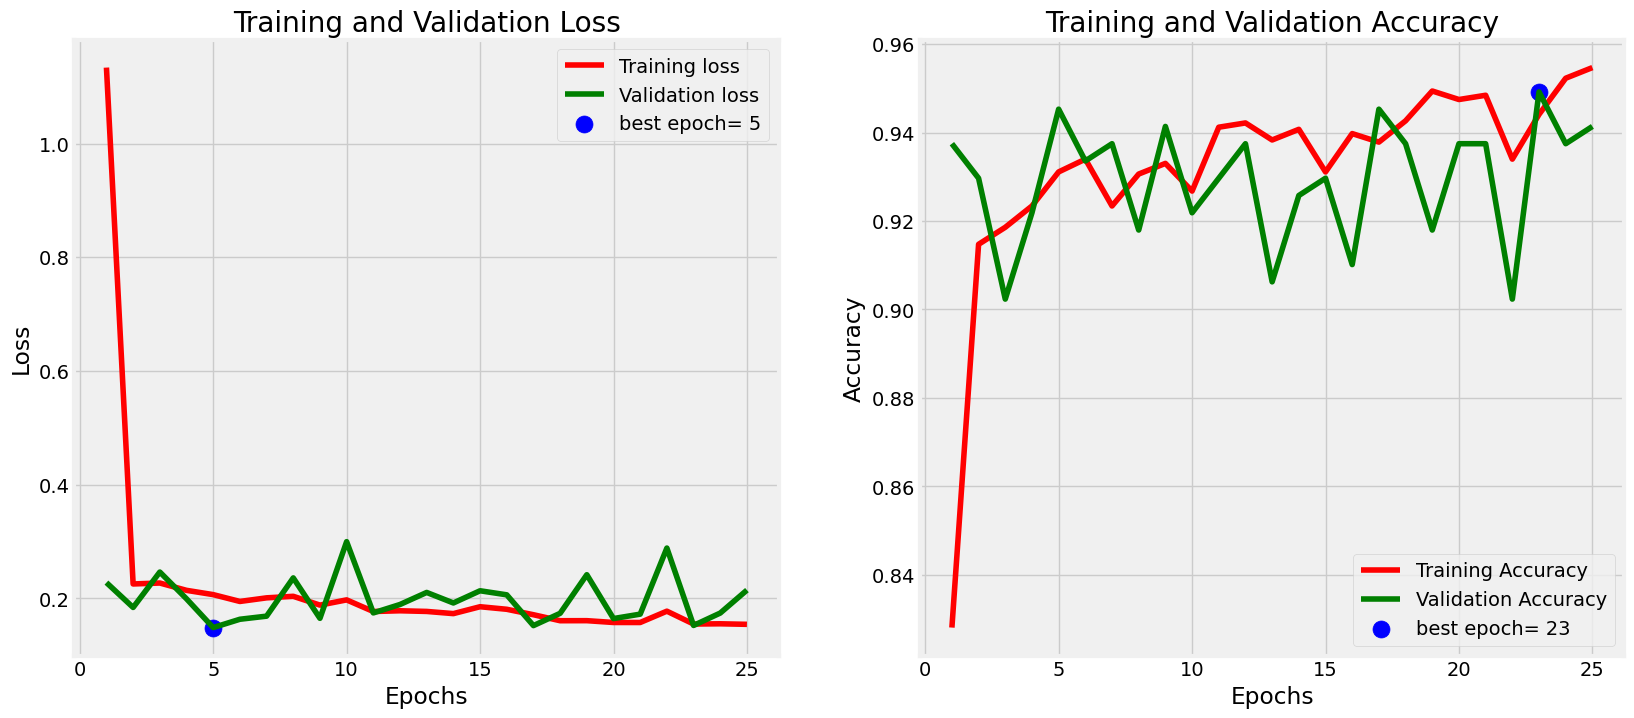

In [24]:
# Define needed variables
tr_acc = model_vgg_history.history['accuracy']
tr_loss =model_vgg_history.history['loss']
val_acc = model_vgg_history.history['val_accuracy']
val_loss = model_vgg_history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [4]:
#Model Transfer Learning : Inception
from tensorflow.keras.applications import InceptionV3

In [5]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

NameError: name 'IMAGE_SIZE' is not defined

In [30]:
for layer in inception.layers:
    print(layer)

In [31]:
model_inception = Sequential()

model_inception.add(inception)
model_inception.add(Flatten())
model_inception.add(Dropout(0.2))
model_inception.add(Dense(256,activation='relu'))
model_inception.add(Dropout(0.2))
model_inception.add(Dense(2,activation='softmax'))

In [32]:
model_inception.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_1 (Flatten)         (None, 51200)             0         
                                                                 
 dropout_2 (Dropout)         (None, 51200)             0         
                                                                 
 dense_2 (Dense)             (None, 256)               13107456  
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 2)                 514       
                                                                 
Total params: 34910754 (133.17 MB)
Trainable params: 3

In [33]:
model_inception.compile(
    optimizer = Adam(lr=0.001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

In [34]:
model_inception_history =model_inception.fit(
  train_set,
  validation_data=validation_set,
  epochs=EPOCHS,
  steps_per_epoch=len(train_set),
  validation_steps=len(test_set)
)

Epoch 1/25
65/65 [==============================] - 237s 3s/step - loss: 0.8951 - accuracy: 0.8348 - val_loss: 15.3791 - val_accuracy: 0.8672
Epoch 2/25
65/65 [==============================] - 215s 3s/step - loss: 0.1782 - accuracy: 0.9393 - val_loss: 1.9465 - val_accuracy: 0.9219
Epoch 3/25
65/65 [==============================] - 221s 3s/step - loss: 0.4128 - accuracy: 0.9041 - val_loss: 122.0030 - val_accuracy: 0.6328
Epoch 4/25
65/65 [==============================] - 208s 3s/step - loss: 0.2229 - accuracy: 0.9403 - val_loss: 15.9328 - val_accuracy: 0.5703
Epoch 5/25
65/65 [==============================] - 201s 3s/step - loss: 0.1344 - accuracy: 0.9571 - val_loss: 0.3020 - val_accuracy: 0.9297
Epoch 6/25
65/65 [==============================] - 274s 4s/step - loss: 0.1273 - accuracy: 0.9644 - val_loss: 0.3518 - val_accuracy: 0.9297
Epoch 7/25
65/65 [==============================] - 225s 3s/step - loss: 0.1058 - accuracy: 0.9668 - val_loss: 0.0703 - val_accuracy: 0.9766
Epoch 8/2

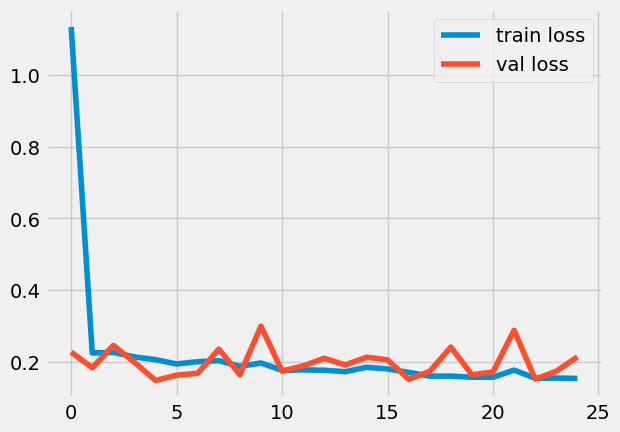

<Figure size 640x480 with 0 Axes>

In [36]:
plt.plot(model_vgg_history.history['loss'], label='train loss')
plt.plot(model_vgg_history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

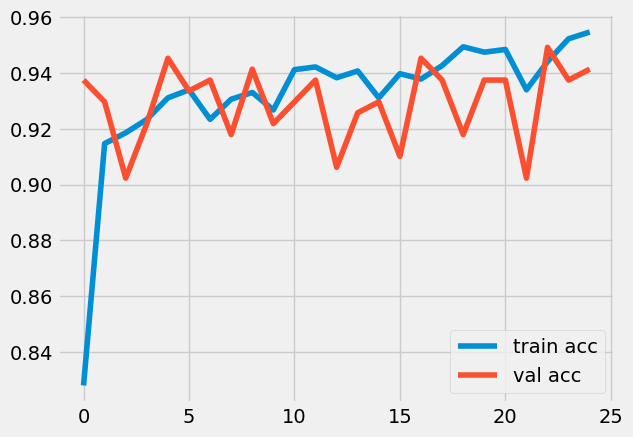

<Figure size 640x480 with 0 Axes>

In [35]:
# plot the accuracy
plt.plot(model_vgg_history.history['accuracy'], label='train acc')
plt.plot(model_vgg_history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

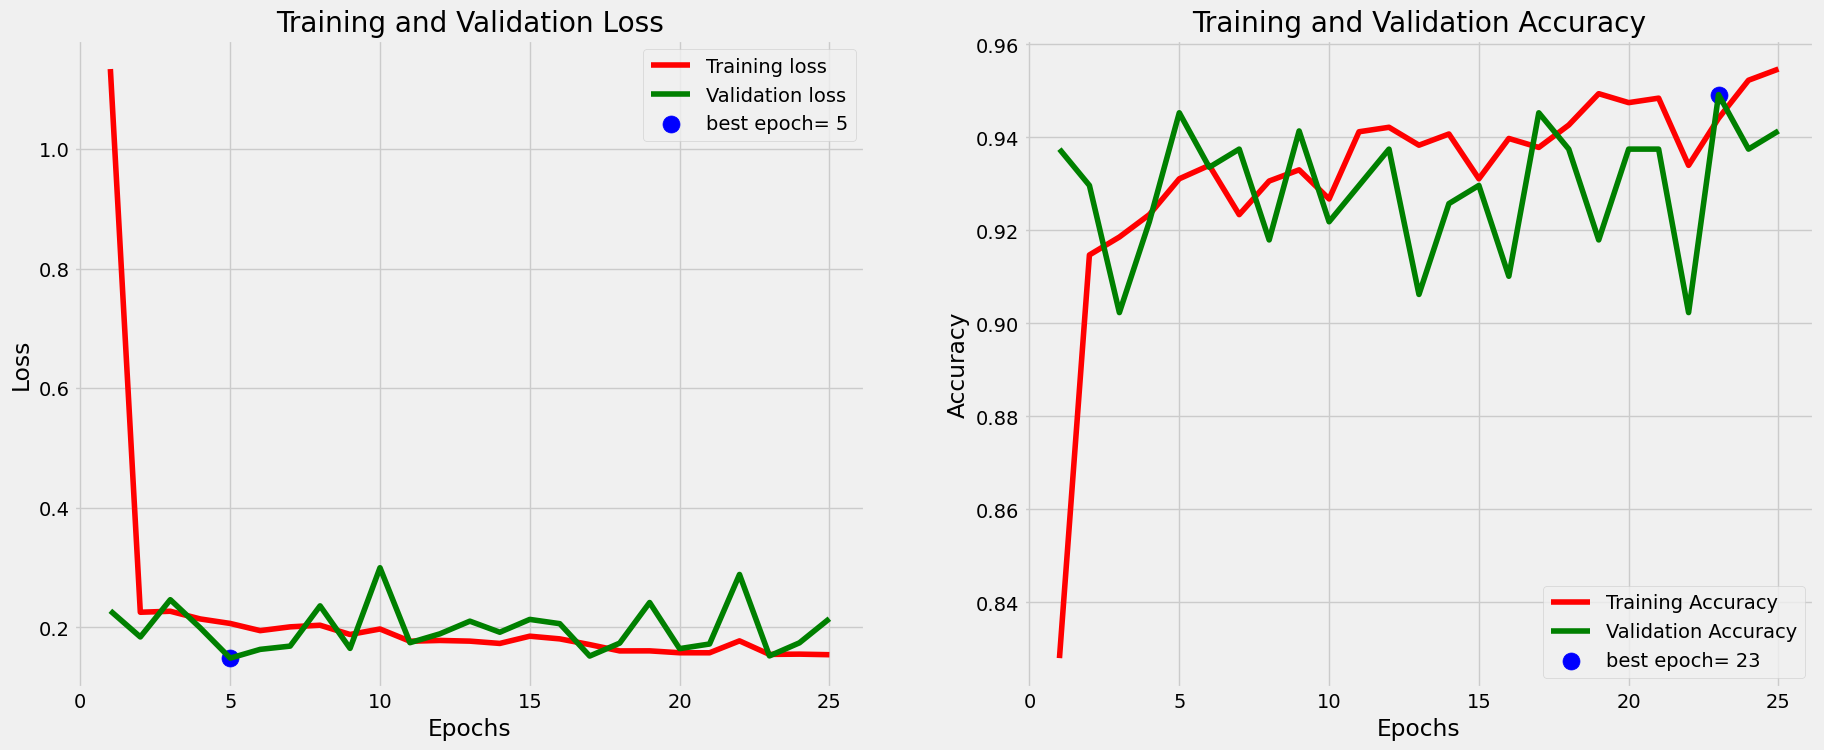

In [37]:
# Define needed variables
tr_acc = model_vgg_history.history['accuracy']
tr_loss =model_vgg_history.history['loss']
val_acc = model_vgg_history.history['val_accuracy']
val_loss = model_vgg_history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [17]:
#Model Transfer Learning : Inception
from tensorflow.keras.applications import InceptionV3

In [18]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [19]:
for layer in inception.layers:
    print(layer)

In [20]:
model_inception = Sequential()

model_inception.add(inception)
model_inception.add(Flatten())
model_inception.add(Dropout(0.2))
model_inception.add(Dense(256,activation='relu'))
model_inception.add(Dropout(0.2))
model_inception.add(Dense(2,activation='softmax'))

In [25]:
model_inception.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 51200)             0         
                                                                 
 dropout (Dropout)           (None, 51200)             0         
                                                                 
 dense (Dense)               (None, 256)               13107456  
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 514       
                                                                 
Total params: 34910754 (133.17 MB)
Trainable params: 348

In [26]:
model_inception.compile(
    optimizer = Adam(lr=0.001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

In [27]:
model_inception_history =model_inception.fit(
  train_set,
  validation_data=validation_set,
  epochs=EPOCHS,
  steps_per_epoch=len(train_set),
  validation_steps=len(test_set)
)

Epoch 1/25



65/65 [==============================] - 312s 4s/step - loss: 0.7493 - accuracy: 0.8926 - val_loss: 584.7927 - val_accuracy: 0.5234
Epoch 2/25
65/65 [==============================] - 254s 4s/step - loss: 0.5764 - accuracy: 0.8844 - val_loss: 1134188.6250 - val_accuracy: 0.5703
Epoch 3/25
65/65 [==============================] - 253s 4s/step - loss: 0.4968 - accuracy: 0.9364 - val_loss: 1770.3557 - val_accuracy: 0.5508
Epoch 4/25
65/65 [==============================] - 253s 4s/step - loss: 0.2187 - accuracy: 0.9465 - val_loss: 11.1716 - val_accuracy: 0.8164
Epoch 5/25
65/65 [==============================] - 257s 4s/step - loss: 0.1766 - accuracy: 0.9533 - val_loss: 0.1512 - val_accuracy: 0.9570
Epoch 6/25
65/65 [==============================] - 235s 4s/step - loss: 0.1200 - accuracy: 0.9639 - val_loss: 0.0975 - val_accuracy: 0.9570
Epoch 7/25
65/65 [==============================] - 230s 4s/step - loss: 0.1371 - accuracy: 0.9634 - val_loss: 0.1538 - val_accuracy: 0.9570
Epoch 8/25
6

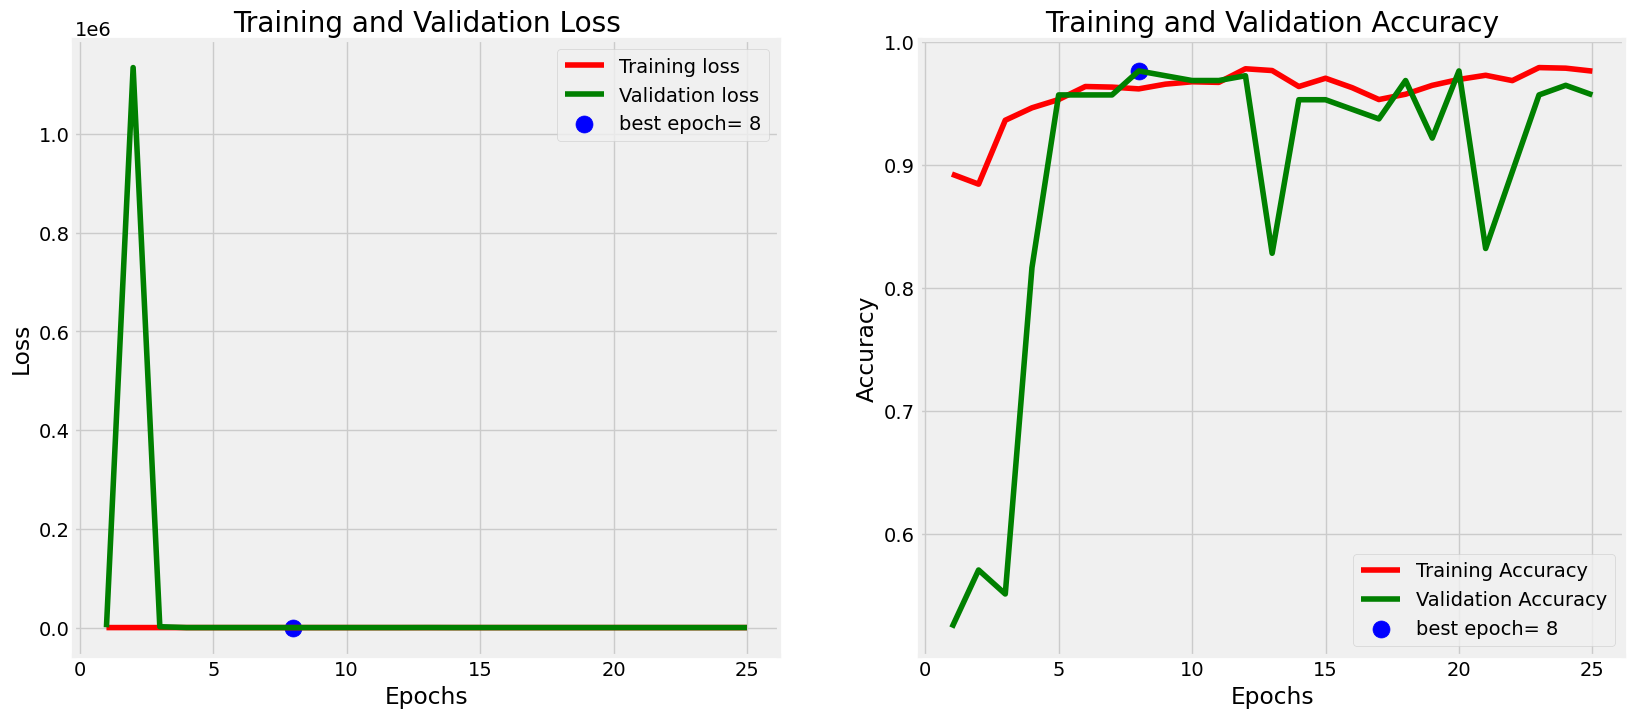

In [28]:
#Inception Model Evaluation
# Define needed variables
tr_acc = model_inception_history.history['accuracy']
tr_loss =model_inception_history.history['loss']
val_acc = model_inception_history.history['val_accuracy']
val_loss = model_inception_history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [29]:
#Model Transfer Learning : ResNet50
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94765736/94765736 [==============================] - 220s 2us/step


In [30]:
for layer in resnet.layers:
    print(layer)

In [31]:
model_resnet = Sequential()

model_resnet.add(inception)
model_resnet.add(Flatten())
model_resnet.add(Dropout(0.2))
model_resnet.add(Dense(256,activation='relu'))
model_resnet.add(Dropout(0.2))
model_resnet.add(Dense(2,activation='softmax'))

In [32]:
model_resnet.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_1 (Flatten)         (None, 51200)             0         
                                                                 
 dropout_2 (Dropout)         (None, 51200)             0         
                                                                 
 dense_2 (Dense)             (None, 256)               13107456  
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 2)                 514       
                                                                 
Total params: 34910754 (133.17 MB)
Trainable params: 3

In [33]:
model_resnet.compile(
    optimizer = Adam(lr=0.001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

In [34]:
model_resnet_history =model_resnet.fit(
  train_set,
  validation_data=validation_set,
  epochs=EPOCHS,
  steps_per_epoch=len(train_set),
  validation_steps=len(test_set)
)

Epoch 1/25
65/65 [==============================] - 249s 4s/step - loss: 1.0744 - accuracy: 0.9171 - val_loss: 99.9304 - val_accuracy: 0.6445
Epoch 2/25
65/65 [==============================] - 230s 4s/step - loss: 0.5815 - accuracy: 0.9263 - val_loss: 11.1363 - val_accuracy: 0.5352
Epoch 3/25
65/65 [==============================] - 226s 3s/step - loss: 0.2302 - accuracy: 0.9412 - val_loss: 3.0397 - val_accuracy: 0.8438
Epoch 4/25
65/65 [==============================] - 225s 3s/step - loss: 0.1415 - accuracy: 0.9586 - val_loss: 16.1705 - val_accuracy: 0.8398
Epoch 5/25
65/65 [==============================] - 211s 3s/step - loss: 0.1840 - accuracy: 0.9518 - val_loss: 0.3780 - val_accuracy: 0.9023
Epoch 6/25
65/65 [==============================] - 201s 3s/step - loss: 0.1340 - accuracy: 0.9663 - val_loss: 0.1978 - val_accuracy: 0.9453
Epoch 7/25
65/65 [==============================] - 219s 3s/step - loss: 0.1259 - accuracy: 0.9634 - val_loss: 7.5110 - val_accuracy: 0.9336
Epoch 8/25

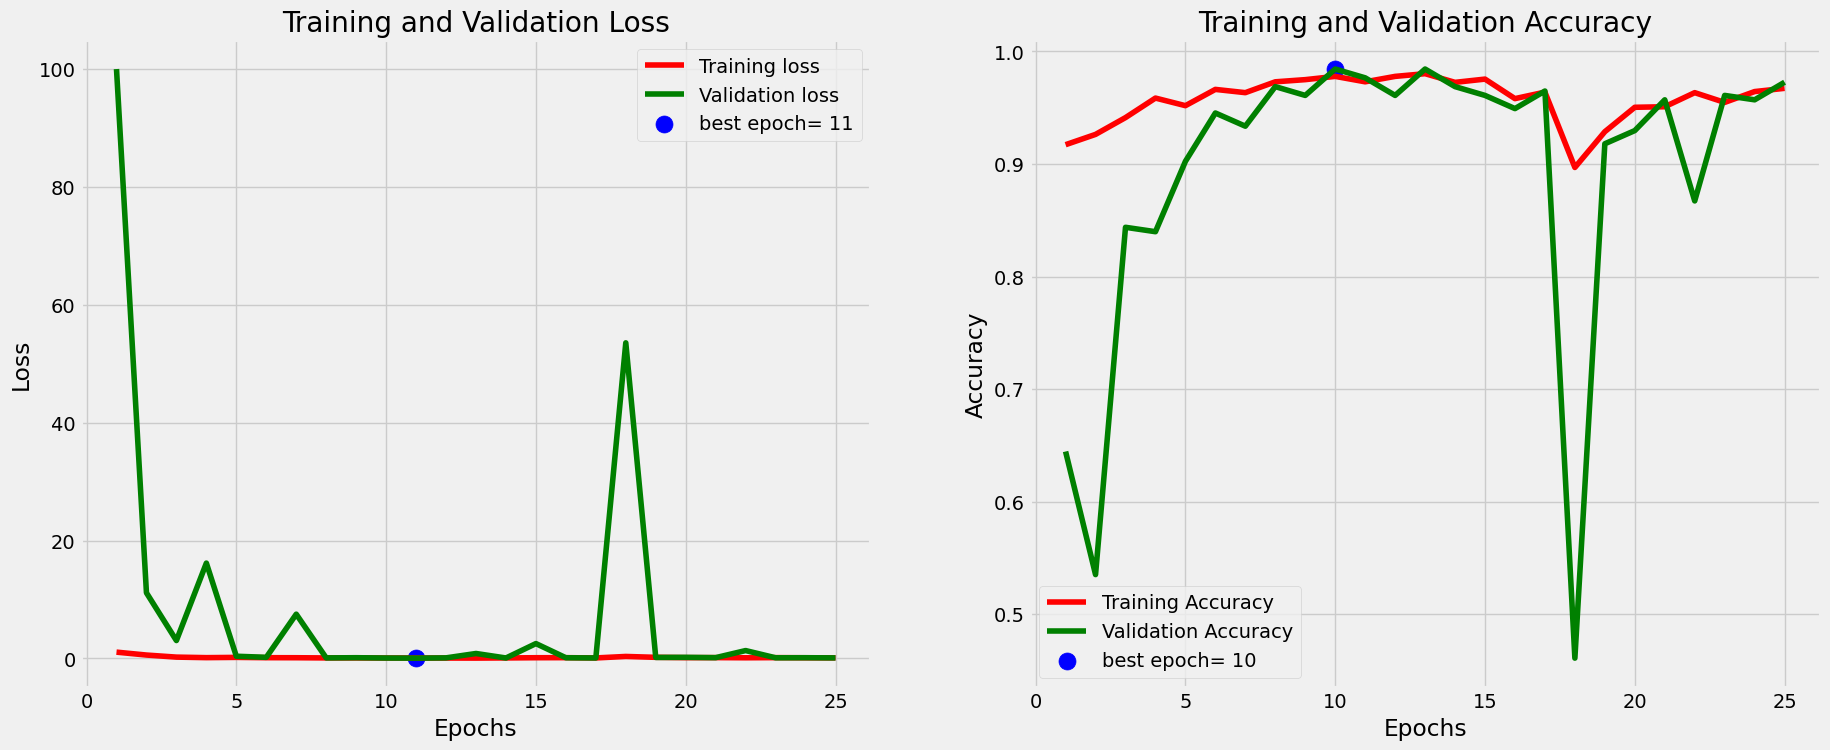

In [35]:
#ResNet50 Model Evaluation
# Define needed variables
tr_acc = model_resnet_history.history['accuracy']
tr_loss = model_resnet_history.history['loss']
val_acc = model_resnet_history.history['val_accuracy']
val_loss = model_resnet_history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [13]:
#Model Transfer Learning : EfficientNet
from tensorflow.keras.applications import EfficientNetB0

In [14]:
efficientnet = EfficientNetB0(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)



A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 50bc09e76180e00e4465e1a485ddc09d so we will re-download the data.
16705208/16705208 [==============================] - 37s 2us/step


In [15]:
for layer in efficientnet.layers:
    print(layer)

In [21]:
model_efficientnet = Sequential()

model_efficientnet.add(inception)
model_efficientnet.add(Flatten())
model_efficientnet.add(Dropout(0.2))
model_efficientnet.add(Dense(512,activation='relu'))
model_efficientnet.add(Dropout(0.2))
model_efficientnet.add(Dense(2,activation='softmax'))

In [22]:
model_efficientnet.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_1 (Flatten)         (None, 51200)             0         
                                                                 
 dropout_2 (Dropout)         (None, 51200)             0         
                                                                 
 dense_2 (Dense)             (None, 512)               26214912  
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 48018722 (183.18 MB)
Trainable params: 4

In [23]:
model_efficientnet.compile(
    optimizer = Adam(lr=0.001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

In [24]:
model_efficientnet_history =model_efficientnet.fit(
  train_set,
  validation_data=validation_set,
  epochs=20,
  steps_per_epoch=len(train_set),
  validation_steps=len(test_set)
)

Epoch 1/20



65/65 [==============================] - 237s 3s/step - loss: 1.7036 - accuracy: 0.7977 - val_loss: 653.7269 - val_accuracy: 0.6445
Epoch 2/20
65/65 [==============================] - 240s 4s/step - loss: 0.7870 - accuracy: 0.8680 - val_loss: 16592.2266 - val_accuracy: 0.5000
Epoch 3/20
65/65 [==============================] - 258s 4s/step - loss: 0.2821 - accuracy: 0.9099 - val_loss: 16.2126 - val_accuracy: 0.6172
Epoch 4/20
65/65 [==============================] - 252s 4s/step - loss: 0.3094 - accuracy: 0.9224 - val_loss: 1.8317 - val_accuracy: 0.5898
Epoch 5/20
65/65 [==============================] - 231s 4s/step - loss: 0.2134 - accuracy: 0.9398 - val_loss: 0.1598 - val_accuracy: 0.9570
Epoch 6/20
65/65 [==============================] - 232s 4s/step - loss: 0.1759 - accuracy: 0.9441 - val_loss: 0.1358 - val_accuracy: 0.9570
Epoch 7/20
65/65 [==============================] - 239s 4s/step - loss: 0.1679 - accuracy: 0.9451 - val_loss: 1.1683 - val_accuracy: 0.6836
Epoch 8/20
65/65 

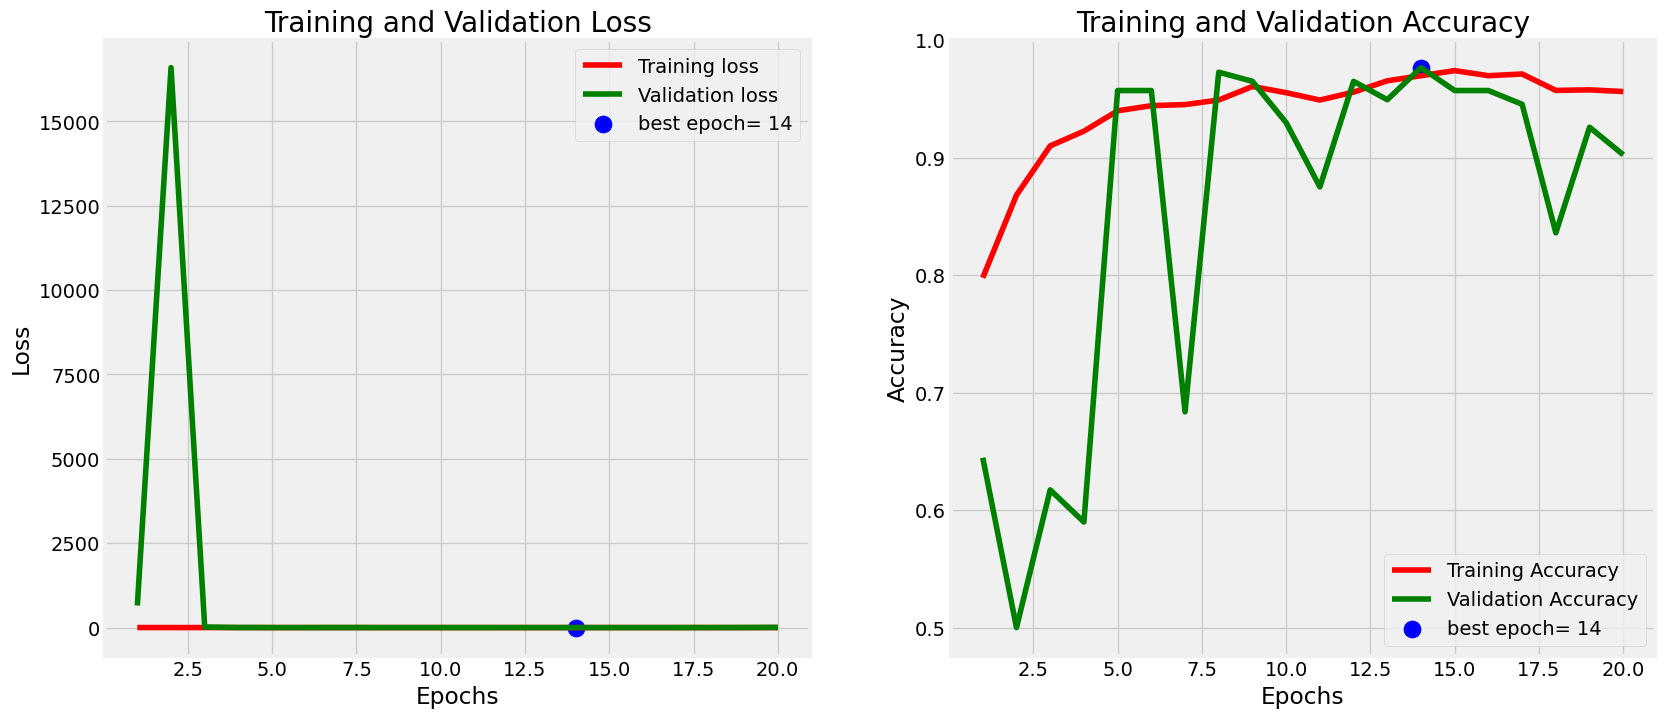

In [25]:
#Efficientnet Model Evaluation
# Define needed variables
tr_acc = model_efficientnet_history.history['accuracy']
tr_loss = model_efficientnet_history.history['loss']
val_acc = model_efficientnet_history.history['val_accuracy']
val_loss = model_efficientnet_history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [26]:
#Model Transfer Learning : MobileNet
from tensorflow.keras.applications import MobileNet

In [27]:
mobilenet = MobileNet(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

17225924/17225924 [==============================] - 54s 3us/step


In [28]:
for layer in mobilenet.layers:
    print(layer)

In [29]:
model_mobilenet = Sequential()

model_mobilenet.add(inception)
model_mobilenet.add(Flatten())
model_mobilenet.add(Dropout(0.2))
model_mobilenet.add(Dense(512,activation='relu'))
model_mobilenet.add(Dropout(0.2))
model_mobilenet.add(Dense(2,activation='softmax'))

In [30]:
model_mobilenet.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_2 (Flatten)         (None, 51200)             0         
                                                                 
 dropout_4 (Dropout)         (None, 51200)             0         
                                                                 
 dense_4 (Dense)             (None, 512)               26214912  
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 48018722 (183.18 MB)
Trainable params: 4

In [31]:
model_mobilenet.compile(
    optimizer = Adam(lr=0.001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

In [32]:
model_mobilenet_history =model_mobilenet.fit(
  train_set,
  validation_data=validation_set,
  epochs=25,
  steps_per_epoch=len(train_set),
  validation_steps=len(test_set)
)

Epoch 1/25
65/65 [==============================] - 309s 4s/step - loss: 0.3265 - accuracy: 0.9186 - val_loss: 4.2556 - val_accuracy: 0.7148
Epoch 2/25
65/65 [==============================] - 265s 4s/step - loss: 0.8458 - accuracy: 0.9017 - val_loss: 255.3448 - val_accuracy: 0.6250
Epoch 3/25
65/65 [==============================] - 262s 4s/step - loss: 0.2010 - accuracy: 0.9249 - val_loss: 0.1915 - val_accuracy: 0.9531
Epoch 4/25
65/65 [==============================] - 263s 4s/step - loss: 0.1654 - accuracy: 0.9494 - val_loss: 0.2133 - val_accuracy: 0.9180
Epoch 5/25
65/65 [==============================] - 263s 4s/step - loss: 0.1591 - accuracy: 0.9417 - val_loss: 683.8833 - val_accuracy: 0.5273
Epoch 6/25
65/65 [==============================] - 265s 4s/step - loss: 0.3879 - accuracy: 0.9306 - val_loss: 1.4051 - val_accuracy: 0.6523
Epoch 7/25
65/65 [==============================] - 265s 4s/step - loss: 0.1947 - accuracy: 0.9316 - val_loss: 0.2509 - val_accuracy: 0.9023
Epoch 8/2

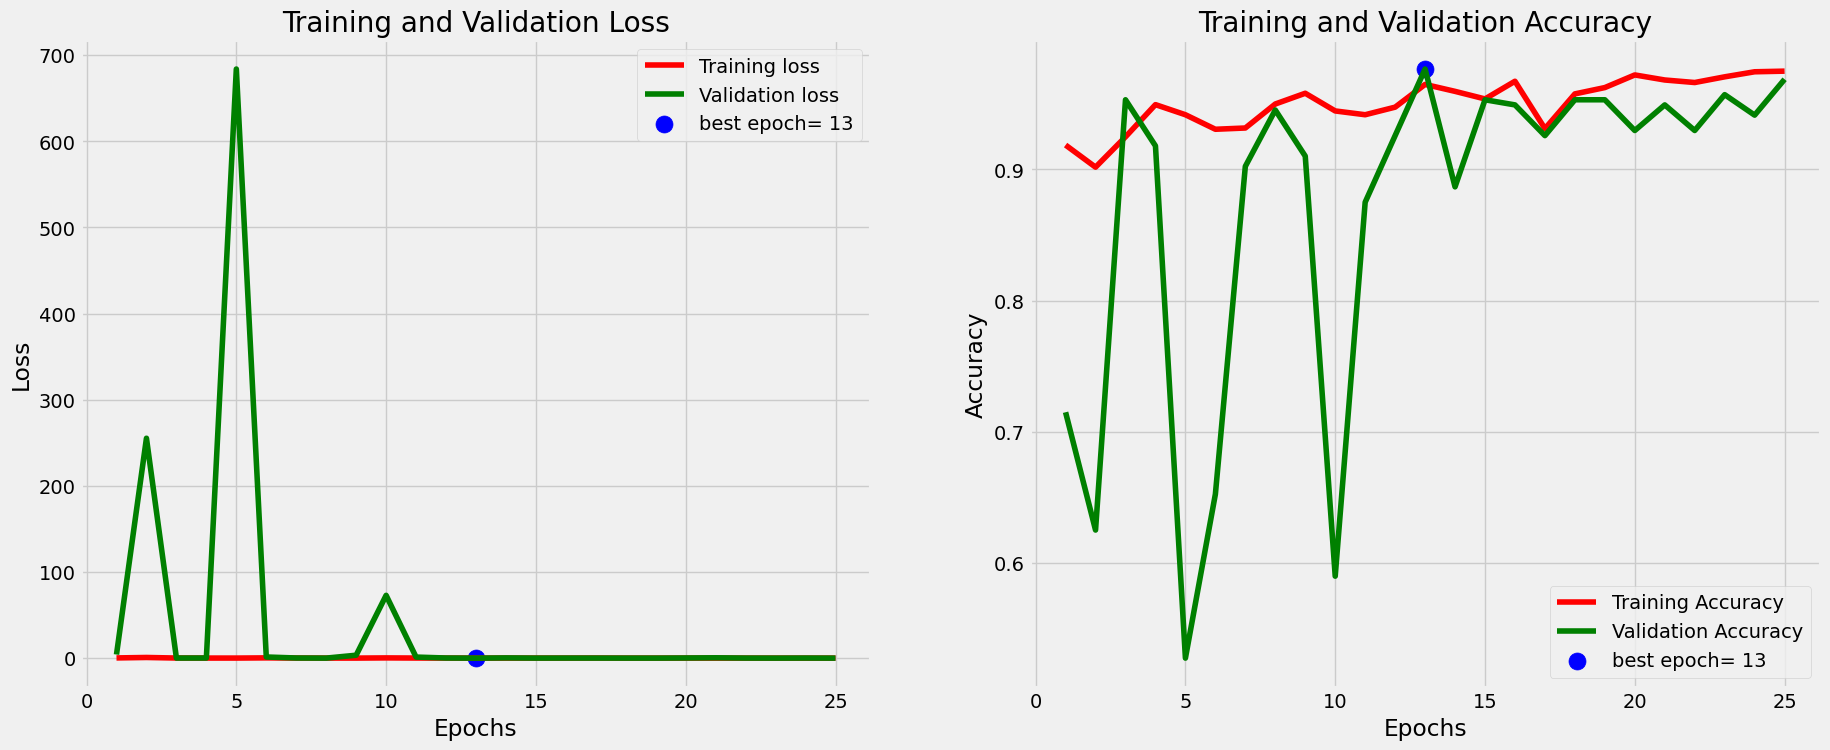

In [33]:
#Mobilenet Model Evaluation
# Define needed variables
tr_acc = model_mobilenet_history.history['accuracy']
tr_loss = model_mobilenet_history.history['loss']
val_acc = model_mobilenet_history.history['val_accuracy']
val_loss = model_mobilenet_history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

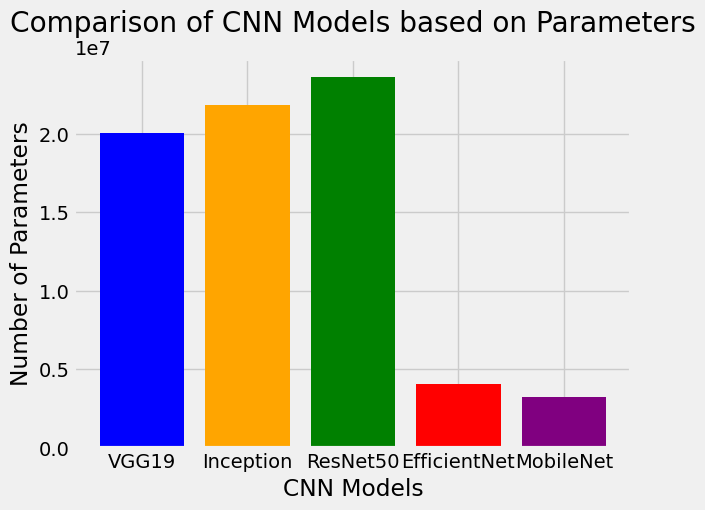

In [34]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG19, InceptionV3, ResNet50, EfficientNetB0, MobileNet

# Load pre-trained models without top layers (no classification head)
vgg19 = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
inception = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
efficientnet = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
mobilenet = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Count the number of parameters in each model
vgg19_params = vgg19.count_params()
inception_params = inception.count_params()
resnet50_params = resnet50.count_params()
efficientnet_params = efficientnet.count_params()
mobilenet_params = mobilenet.count_params()

# Create a bar plot
models = ['VGG19', 'Inception', 'ResNet50', 'EfficientNet', 'MobileNet']
parameters = [vgg19_params, inception_params, resnet50_params, efficientnet_params, mobilenet_params]

plt.bar(models, parameters, color=['blue', 'orange', 'green', 'red', 'purple'])
plt.xlabel('CNN Models')
plt.ylabel('Number of Parameters')
plt.title('Comparison of CNN Models based on Parameters')
plt.show()

In [35]:
#Prediction
import numpy as np

def extract_data(generator):
    data_list = []
    labels_list = []
    for _ in range(generator.__len__()):
        data, labels = generator.next()
        data_list.append(data)
        labels_list.append(labels)
    x = np.vstack(data_list)
    y = np.vstack(labels_list)
    return x, y

x_train, y_train = extract_data(train_set)
x_test, y_test = extract_data(validation_set)

In [36]:
loss = model_efficientnet.evaluate(x_test,y_test) 
print("Test Acc: " + str(loss[1]))

17/17 [==============================] - 21s 1s/step - loss: 0.1459 - accuracy: 0.9548
Test Acc: 0.9548022747039795


In [37]:
preds_vgg = model_efficientnet.predict(x_test)
y_pred_vgg = np.argmax(preds_vgg , axis = 1 )

17/17 [==============================] - 25s 1s/step


In [38]:
print(len(x_test))

531


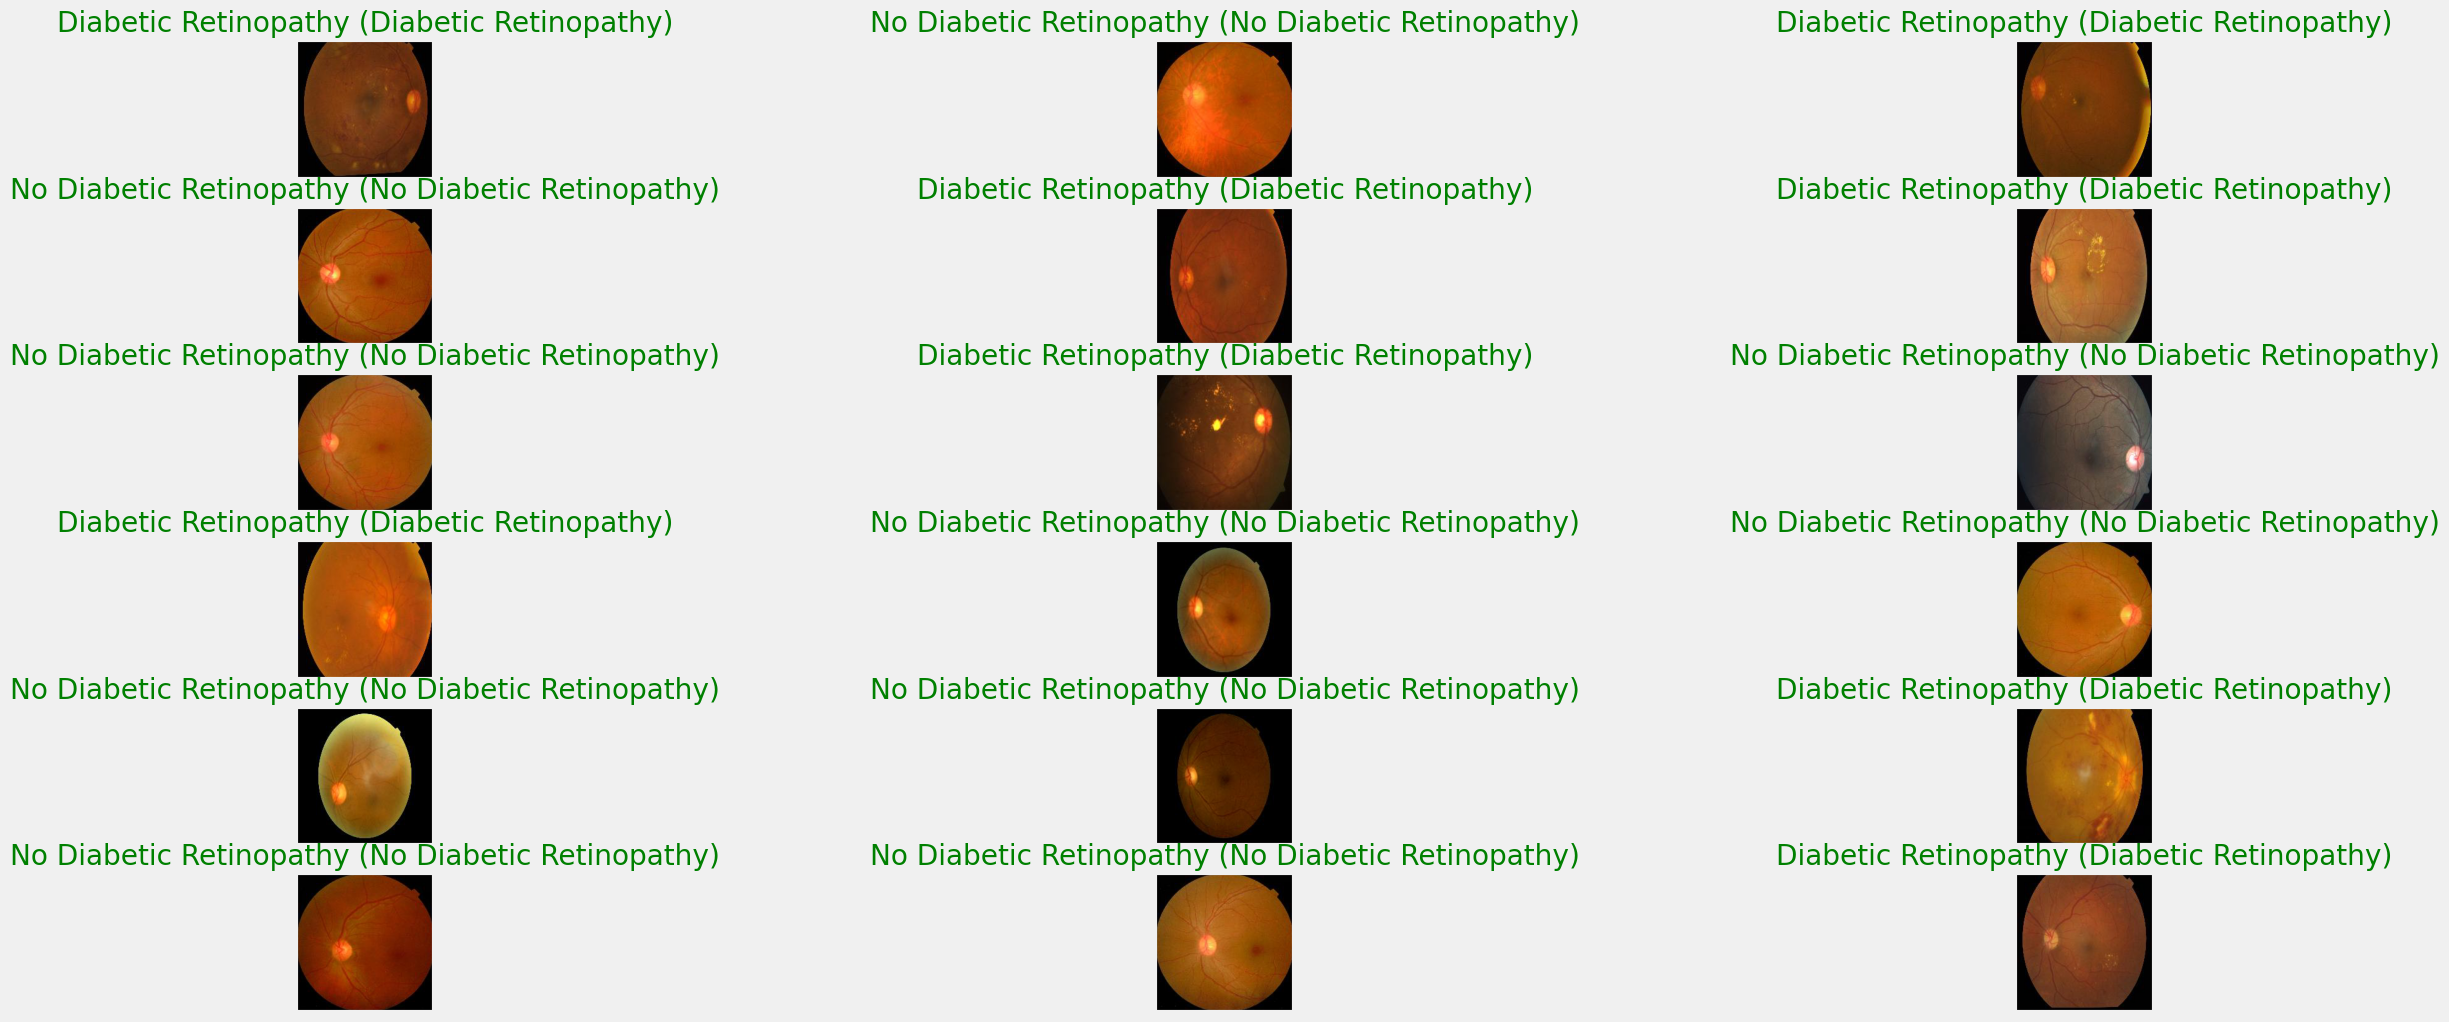

In [39]:
label_dict = {0 : 'Diabetic Retinopathy', 1 : 'No Diabetic Retinopathy'}

figure = plt.figure(figsize=(28, 12))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=18)):
    ax = figure.add_subplot(6,3 , i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[index]))
    predict_index_vgg = label_dict[(y_pred_vgg[index])]
    true_index_vgg = label_dict[np.argmax(y_test,axis=1)[index]]
    
    ax.set_title("{} ({})".format((predict_index_vgg), 
                                  ( true_index_vgg)),
                                  color=("green" if predict_index_vgg == true_index_vgg else "red"))